In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import researchpy, numpy, pandas
import scipy.stats
from scipy import stats
import math
import statistics
import researchpy as rp
import scipy.stats as stats

In [55]:
#De data binnenhalen
train = pd.read_csv('Airlinesatisfaction.csv')

In [80]:
# Drop unnecessary columns
new_train = train.drop('Unnamed: 0', axis=1)
new_train = train.drop('id', axis=1)

new_train.head()

,Unnamed: 0,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [134]:
#Random steekproef van 100
random_subset = new_train.sample(n=100) 
random_subset.head(5)

,Unnamed: 0,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
69894,69894,Female,disloyal Customer,23,Business travel,Eco,1131,2,2,2,...,2,2,2,3,3,4,2,0,0.0,neutral or dissatisfied
24110,24110,Male,Loyal Customer,55,Personal Travel,Business,1299,2,4,2,...,1,1,2,1,5,1,5,20,40.0,neutral or dissatisfied
56805,56805,Male,Loyal Customer,39,Personal Travel,Eco,427,1,2,3,...,4,3,2,3,3,4,4,0,0.0,neutral or dissatisfied
20018,20018,Male,disloyal Customer,36,Business travel,Business,216,1,1,1,...,4,3,1,3,4,4,4,5,13.0,neutral or dissatisfied
29500,29500,Female,Loyal Customer,57,Business travel,Business,3190,1,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied


In [135]:
#Check de data even; zorg dat je geen missing values hebt (zit alleen bij Arrival Delay)
random_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 69894 to 76197
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         100 non-null    int64  
 1   Gender                             100 non-null    object 
 2   Customer Type                      100 non-null    object 
 3   Age                                100 non-null    int64  
 4   Type of Travel                     100 non-null    object 
 5   Class                              100 non-null    object 
 6   Flight Distance                    100 non-null    int64  
 7   Inflight wifi service              100 non-null    int64  
 8   Departure/Arrival time convenient  100 non-null    int64  
 9   Ease of Online booking             100 non-null    int64  
 10  Gate location                      100 non-null    int64  
 11  Food and drink                     100 non-null    i

In [136]:
#Vervang codering voor cijfers
random_subset['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)
random_subset.head()

,Unnamed: 0,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
69894,69894,Female,disloyal Customer,23,Business travel,Eco,1131,2,2,2,...,2,2,2,3,3,4,2,0,0.0,0
24110,24110,Male,Loyal Customer,55,Personal Travel,Business,1299,2,4,2,...,1,1,2,1,5,1,5,20,40.0,0
56805,56805,Male,Loyal Customer,39,Personal Travel,Eco,427,1,2,3,...,4,3,2,3,3,4,4,0,0.0,0
20018,20018,Male,disloyal Customer,36,Business travel,Business,216,1,1,1,...,4,3,1,3,4,4,4,5,13.0,0
29500,29500,Female,Loyal Customer,57,Business travel,Business,3190,1,1,1,...,4,4,4,4,3,4,5,0,0.0,1


In [137]:
#Eens kijken wat we in de dataset hebben; de variabelen met gemiddelde en de standaardafwijking
random_subset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,100.0,50336.54,31917.045531,2835.0,22579.25,46532.5,78964.25,103719.0
Age,100.0,40.09,14.359803,13.0,28.00,39.0,52.25,72.0
Flight Distance,100.0,1219.71,949.754804,109.0,449.00,1009.0,1615.50,3834.0
Inflight wifi service,100.0,2.52,1.410495,0.0,1.00,3.0,4.00,5.0
Departure/Arrival time convenient,100.0,2.94,1.448231,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,100.0,2.52,1.344499,0.0,1.00,3.0,3.25,5.0
Gate location,100.0,2.93,1.273308,1.0,2.00,3.0,4.00,5.0
Food and drink,100.0,3.06,1.391315,1.0,2.00,3.0,4.00,5.0
Online boarding,100.0,3.26,1.338022,0.0,2.00,3.5,4.00,5.0
Seat comfort,100.0,3.36,1.389135,1.0,2.00,4.0,5.00,5.0


In [138]:
random_subset['Age'].value_counts()

39    8
22    5
57    5
54    4
28    4
37    4
36    4
25    3
53    3
40    3
19    3
44    3
58    3
49    3
23    3
34    2
43    2
20    2
50    2
38    2
52    2
46    2
32    2
42    2
65    2
16    2
13    1
15    1
26    1
35    1
29    1
24    1
70    1
48    1
72    1
21    1
41    1
66    1
60    1
51    1
30    1
33    1
59    1
64    1
55    1
61    1
Name: Age, dtype: int64

In [ ]:
random_subset['satisfaction'].value_counts()

In [139]:
#Mooiere output
rp.summary_cont(random_subset['Age'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Age,100.0,40.09,14.3598,1.436,37.2407,42.9393


In [146]:
#Bekend is dat een aantal libraries niet werken met spaties in de variabele namen. Deze eerst maar omzetten
# Replace spaces in the column names with underscore
random_subset.columns = [c.replace(' ', '_') for c in random_subset.columns]

In [149]:
rp.summary_cont(random_subset['Flight_Distance'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Flight_Distance,100.0,1219.71,949.7548,94.9755,1031.258,1408.162


C:\Users\Aghoo\AppData\Local\Temp\ipykernel_19784\931596904.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, bins = 15)


Text(0.5, 1.0, 'Flight Distance Distribution')

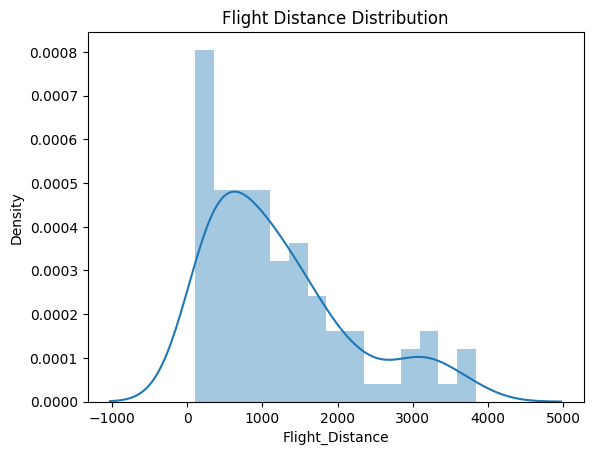

In [142]:
#Visuele checks van de verdelingen
x = random_subset['Flight_Distance']
sns.distplot(x, bins = 15)
plt.title('Flight Distance Distribution')


C:\Users\Aghoo\AppData\Local\Temp\ipykernel_19784\3321396133.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, bins = 15)


Text(0.5, 1.0, 'Age')

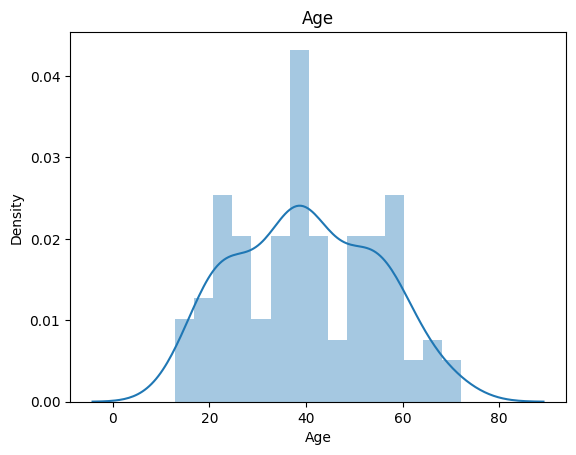

In [144]:
x = random_subset['Age']
sns.distplot(x, bins = 15)
plt.title('Age')


C:\Users\Aghoo\AppData\Local\Temp\ipykernel_19784\2432483861.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, bins = 15)


Text(0.5, 1.0, 'Departure Delay in Minutes')

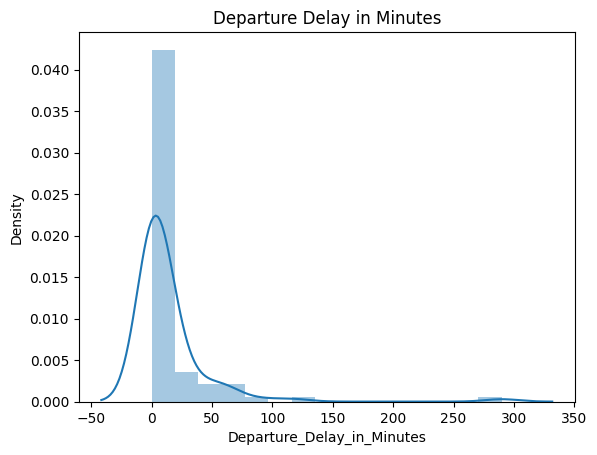

In [150]:
x = random_subset['Departure_Delay_in_Minutes']
sns.distplot(x, bins = 15)
plt.title('Departure Delay in Minutes')

C:\Users\Aghoo\AppData\Local\Temp\ipykernel_19784\403260203.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, bins = 15)


Text(0.5, 1.0, 'Arrival Delay in Minutes')

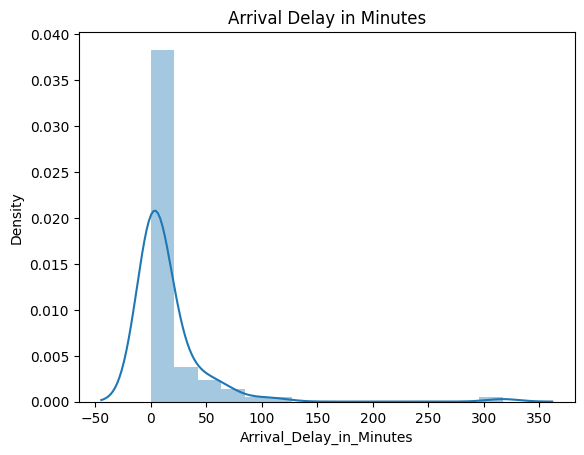

In [151]:
x = random_subset['Arrival_Delay_in_Minutes']
sns.distplot(x, bins = 15)
plt.title('Arrival Delay in Minutes')

In [195]:
#We willen een toets doen om te bepalen of de data normaal verdeeld is
#Dan moeten we de betrefffende variabele eerst sorteren van laag naar hoog
#Dat blijkt evenwel slechts bij sommige librairies met KS nodig te zijn
#Hierbij toch de code, voor het geval je een andere library gebruikt
#waarbij het wel nodig is
random_subset.sort_values(
    ['Age'],
    ascending=True,
    inplace=True)

random_subset.sort_values(
    ['Flight_Distance'],
    ascending=True,
    inplace=True)

random_subset.sort_values(
    ['Departure_Delay_in_Minutes'],
    ascending=True,
    inplace=True)

random_subset.sort_values(
    ['Arrival_Delay_in_Minutes'],
    ascending=True,
    inplace=True)

In [196]:
#Vervolgens moeten we de data normaliseren (dus omzetten in z -scores)
#Ik maak daar een nieuwe dataset van (df_z)
from sklearn.preprocessing import StandardScaler
#En ik zet eerst alle scores om in cijfers
random_subset['Gender'].replace({'Male': 0, 'Female': 1}, inplace = True)
random_subset['Customer_Type'].replace({'disloyal Customer': 0, 'Loyal Customer': 1}, inplace = True)
random_subset['Type_of_Travel'].replace({'Personal Travel': 0, 'Business travel': 1}, inplace = True)
random_subset['Class'].replace({'Eco': 1, 'Eco Plus': 2, 'Business':3}, inplace = True)

In [197]:
#Eindelijk is het zover
random_subset[0:5]

,Unnamed:_0,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
50242,50242,1,1,57,1,3,2528,4,5,4,...,5,5,5,5,4,5,3,0,0.0,1
11585,11585,0,1,19,0,1,1428,4,1,4,...,3,2,2,2,4,3,3,10,0.0,1
29500,29500,1,1,57,1,3,3190,1,1,1,...,4,4,4,4,3,4,5,0,0.0,1
87632,87632,0,1,20,1,3,3163,2,2,2,...,4,4,3,5,4,4,4,0,0.0,1
10666,10666,0,1,36,1,3,3114,1,1,1,...,3,3,4,5,4,3,5,0,0.0,1


In [198]:
scaler = StandardScaler()
df_z = pd.DataFrame(scaler.fit_transform(random_subset), columns = random_subset.columns)
df_z[0:5]

,Unnamed:_0,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,-0.002977,1.040833,0.546536,1.183525,0.592749,0.821004,1.384443,1.054563,1.429591,1.106328,...,1.290506,1.262418,1.245668,1.188056,0.660975,1.190980,-0.159850,-0.408481,-0.414434,1.040833
1,-1.220250,-0.960769,0.546536,-1.476082,-1.687055,-1.257486,0.220414,1.054563,-1.346314,1.106328,...,-0.201408,-1.180971,-1.180958,-1.432656,0.660975,-0.684579,-0.159850,-0.121021,-0.414434,1.040833
2,-0.656123,1.040833,0.546536,1.183525,0.592749,0.821004,2.084976,-1.083065,-1.346314,-1.136228,...,0.544549,0.447955,0.436793,0.314485,-0.197434,0.253200,1.362527,-0.408481,-0.414434,1.040833
3,1.174399,-0.960769,0.546536,-1.406092,0.592749,0.821004,2.056404,-0.370522,-0.652337,-0.388710,...,0.544549,0.447955,-0.372083,1.188056,0.660975,0.253200,0.601339,-0.408481,-0.414434,1.040833
4,-1.249188,-0.960769,0.546536,-0.286258,0.592749,0.821004,2.004552,-1.083065,-1.346314,-1.136228,...,-0.201408,-0.366508,0.436793,1.188056,0.660975,-0.684579,1.362527,-0.408481,-0.414434,1.040833


In [199]:
#Dan een test. Er zijn vele mogelijkheden; we kiezen voor de Kolmogorov Smirnov Test
#Deze voer ik dus uit op de gestandaardiseerde dataset
stats.kstest(df_z['Age'], stats.norm.cdf)

KstestResult(statistic=0.07454879981240173, pvalue=0.6079202720247855, statistic_location=-1.0561440665591788, statistic_sign=1)

In [200]:
stats.kstest(df_z['Flight_Distance'], stats.norm.cdf)


KstestResult(statistic=0.1383123573341588, pvalue=0.03942256559955981, statistic_location=-0.19757795347898016, statistic_sign=1)

In [201]:
stats.kstest(df_z['Departure_Delay_in_Minutes'], stats.norm.cdf)

KstestResult(statistic=0.3414603707065979, pvalue=6.534961859941724e-11, statistic_location=-0.40848077581975606, statistic_sign=-1)

In [202]:
stats.kstest(df_z['Arrival_Delay_in_Minutes'], stats.norm.cdf)

KstestResult(statistic=0.3392781626081975, pvalue=8.953227462629066e-11, statistic_location=-0.4144339562048698, statistic_sign=-1)

In [203]:
random_subset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed:_0,100.0,50336.54,31917.045531,2835.0,22579.25,46532.5,78964.25,103719.0
Gender,100.0,0.48,0.502117,0.0,0.00,0.0,1.00,1.0
Customer_Type,100.0,0.77,0.422953,0.0,1.00,1.0,1.00,1.0
Age,100.0,40.09,14.359803,13.0,28.00,39.0,52.25,72.0
Type_of_Travel,100.0,0.74,0.440844,0.0,0.00,1.0,1.00,1.0
Class,100.0,2.21,0.967085,1.0,1.00,3.0,3.00,3.0
Flight_Distance,100.0,1219.71,949.754804,109.0,449.00,1009.0,1615.50,3834.0
Inflight_wifi_service,100.0,2.52,1.410495,0.0,1.00,3.0,4.00,5.0
Departure/Arrival_time_convenient,100.0,2.94,1.448231,0.0,2.00,3.0,4.00,5.0
Ease_of_Online_booking,100.0,2.52,1.344499,0.0,1.00,3.0,3.25,5.0


<AxesSubplot: xlabel='Age'>

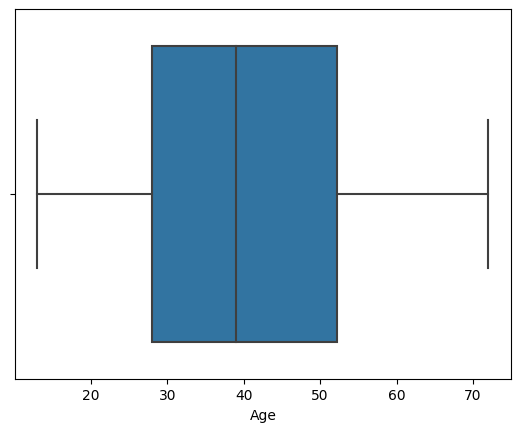

In [204]:
import seaborn as sns
sns.boxplot(x=random_subset['Age'])

<AxesSubplot: xlabel='Flight_Distance'>

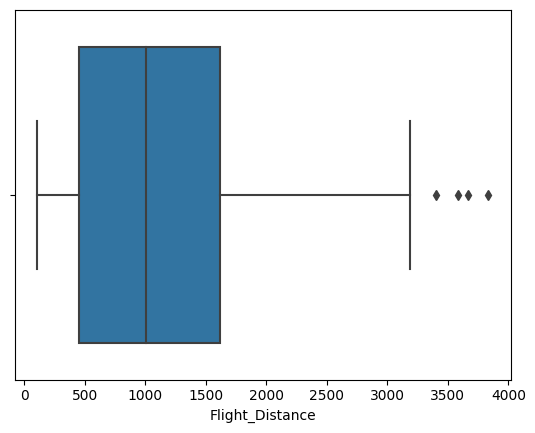

In [205]:
sns.boxplot(x=random_subset['Flight_Distance'])

<AxesSubplot: xlabel='Departure_Delay_in_Minutes'>

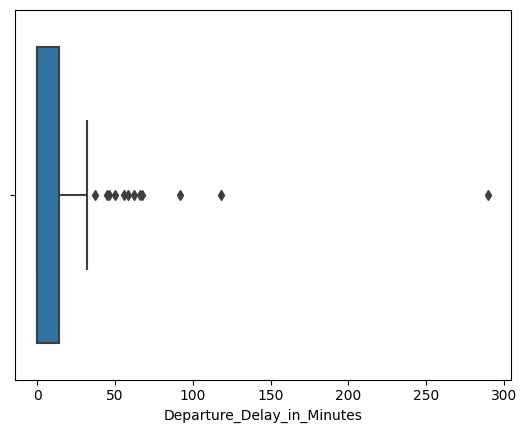

In [206]:
sns.boxplot(x=random_subset['Departure_Delay_in_Minutes'])

<AxesSubplot: xlabel='Arrival_Delay_in_Minutes'>

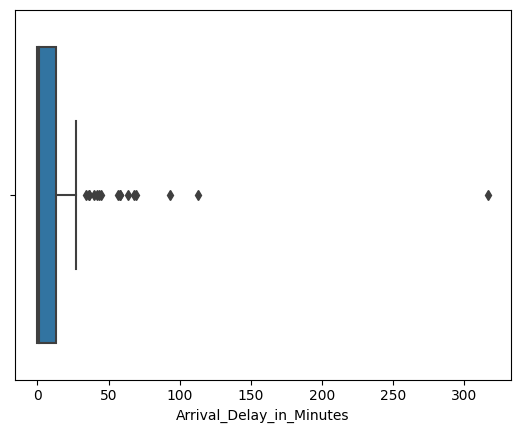

In [207]:
sns.boxplot(x=random_subset['Arrival_Delay_in_Minutes'])

In [209]:
# Maak eerst een opsplitsing in de data tussen tevreden en ontevreden passagiers
tevreden = random_subset.loc[random_subset['satisfaction'] == 1]
ontevreden = random_subset.loc[random_subset['satisfaction'] == 0]

In [211]:
#Correlaties berekenen. Een gemakkelijke waarbij we alle relevante variabelen in een tabel krijgen
random_subset.corr()

,Unnamed:_0,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
Unnamed:_0,1.000000,-0.073640,-0.152230,-0.054302,0.164229,0.065285,0.001788,-0.096593,-0.191320,-0.054597,...,-0.055326,0.049690,-0.128818,0.002600,0.166843,-0.006370,-0.052945,-0.061670,-0.047807,0.064297
Gender,-0.073640,1.000000,0.097028,0.153652,0.113169,0.039939,0.215453,0.243029,0.206693,0.105335,...,0.120046,0.299962,0.128228,0.074838,-0.035051,0.149414,0.044489,-0.036870,-0.013574,0.198718
Customer_Type,-0.152230,0.097028,1.000000,0.291163,-0.323958,0.094582,0.327404,0.067050,0.191620,0.052578,...,0.145528,-0.031933,0.088031,-0.068087,-0.136870,-0.116099,0.123539,-0.023341,0.009720,0.239717
Age,-0.054302,0.153652,0.291163,1.000000,-0.093599,0.075726,0.057289,0.056015,0.162976,0.078122,...,0.279095,0.143622,-0.081036,0.052117,-0.128012,-0.026628,0.253116,0.135666,0.175419,0.020565
Type_of_Travel,0.164229,0.113169,-0.323958,-0.093599,1.000000,0.555832,0.199188,0.122159,-0.293643,0.042946,...,0.204416,0.272952,0.331196,0.211903,0.097459,0.106470,0.094751,0.157586,0.079390,0.478230
Class,0.065285,0.039939,0.094582,0.075726,0.555832,1.000000,0.347001,-0.162319,-0.207276,-0.108138,...,0.111091,0.199333,0.255044,0.268362,0.153173,0.103988,0.075863,0.092786,0.041560,0.372764
Flight_Distance,0.001788,0.215453,0.327404,0.057289,0.199188,0.347001,1.000000,-0.142750,-0.114046,-0.081816,...,0.044638,0.012170,0.133481,0.101322,0.091398,-0.109426,0.055475,0.035202,-0.000410,0.348131
Inflight_wifi_service,-0.096593,0.243029,0.067050,0.056015,0.122159,-0.162319,-0.142750,1.000000,0.495081,0.777440,...,0.265551,0.229815,0.271349,-0.014192,-0.042571,0.153955,0.087215,0.038524,0.072713,0.257291
Departure/Arrival_time_convenient,-0.191320,0.206693,0.191620,0.162976,-0.293643,-0.207276,-0.114046,0.495081,1.000000,0.602384,...,-0.007144,0.105696,0.071627,0.059654,-0.170494,0.139140,-0.093711,-0.021294,0.051433,-0.071120
Ease_of_Online_booking,-0.054597,0.105335,0.052578,0.078122,0.042946,-0.108138,-0.081816,0.777440,0.602384,1.000000,...,0.105724,0.180213,0.139553,0.004702,-0.160162,0.119452,-0.027995,0.040200,0.070046,0.060448


In [212]:
#Correlatie berekenen
stats.pearsonr(random_subset['Age'],random_subset['Departure_Delay_in_Minutes'])

PearsonRResult(statistic=0.13566621619771135, pvalue=0.17835512572021486)

In [214]:
#Tijd voor meer overzicht
import pingouin as pg

In [215]:
#Correlatie tussen alle variabelen in een tabel
random_subset.iloc[:, 0:25].rcorr() # alleen de kolommen met meer dan 50% niet-null waardes worden meegenomen.

,Unnamed:_0,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
Unnamed:_0,-,,,,,,,,,,...,,,,,,,,,,
Gender,-0.074,-,,,,,*,*,*,,...,,**,,,,,,,,*
Customer_Type,-0.152,0.097,-,**,**,,***,,,,...,,,,,,,,,,*
Age,-0.054,0.154,0.291,-,,,,,,,...,**,,,,,,*,,,
Type_of_Travel,0.164,0.113,-0.324,-0.094,-,***,*,,**,,...,*,**,***,*,,,,,,***
Class,0.065,0.04,0.095,0.076,0.556,-,***,,*,,...,,*,*,**,,,,,,***
Flight_Distance,0.002,0.215,0.327,0.057,0.199,0.347,-,,,,...,,,,,,,,,,***
Inflight_wifi_service,-0.097,0.243,0.067,0.056,0.122,-0.162,-0.143,-,***,***,...,**,*,**,,,,,,,**
Departure/Arrival_time_convenient,-0.191,0.207,0.192,0.163,-0.294,-0.207,-0.114,0.495,-,***,...,,,,,,,,,,
Ease_of_Online_booking,-0.055,0.105,0.053,0.078,0.043,-0.108,-0.082,0.777,0.602,-,...,,,,,,,,,,


In [216]:
#Beperking van aantal variabelen met nu ook de p waardes in de tabel
#Bepaal het significantie niveau (p waardes)
#Onder de diagonaal de r waardes; boven de diagonaal de p waardes
random_subset.iloc[:, [0,1,2,5,20,21]].rcorr(stars=False, decimals=3)

,Unnamed:_0,Gender,Customer_Type,Class,Cleanliness,Departure_Delay_in_Minutes
Unnamed:_0,-,0.467,0.131,0.519,0.601,0.542
Gender,-0.074,-,0.337,0.693,0.660,0.716
Customer_Type,-0.152,0.097,-,0.349,0.221,0.818
Class,0.065,0.04,0.095,-,0.453,0.359
Cleanliness,-0.053,0.044,0.124,0.076,-,0.517
Departure_Delay_in_Minutes,-0.062,-0.037,-0.023,0.093,-0.066,-


In [217]:
#Niet omdat het moet, maar omdat het kan 
random_subset.iloc[:, [0,1,6,7,8,9,10,11,12,13,14,15,16,17,18,19]].rcorr(stars=False, decimals=3)

,Unnamed:_0,Gender,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service
Unnamed:_0,-,0.467,0.986,0.339,0.057,0.59,0.325,0.163,0.845,0.536,0.585,0.623,0.201,0.98,0.097,0.95
Gender,-0.074,-,0.031,0.015,0.039,0.297,0.074,0.873,0.019,0.091,0.234,0.002,0.204,0.459,0.729,0.138
Flight_Distance,0.002,0.215,-,0.157,0.259,0.418,0.468,0.641,0.007,0.019,0.659,0.904,0.186,0.316,0.366,0.278
Inflight_wifi_service,-0.097,0.243,-0.143,-,0.000,0.000,0.001,0.092,0.000,0.301,0.008,0.021,0.006,0.889,0.674,0.126
Departure/Arrival_time_convenient,-0.191,0.207,-0.114,0.495,-,0.000,0.000,0.791,0.422,0.810,0.944,0.295,0.479,0.555,0.09,0.167
Ease_of_Online_booking,-0.055,0.105,-0.082,0.777,0.602,-,0.000,0.836,0.000,0.903,0.295,0.073,0.166,0.963,0.111,0.237
Gate_location,0.099,0.179,-0.073,0.33,0.381,0.434,-,0.484,0.733,0.978,0.223,0.710,0.457,0.972,0.024,0.655
Food_and_drink,-0.141,0.016,-0.047,0.169,0.027,0.021,0.071,-,0.043,0.000,0.000,0.439,0.516,0.185,0.032,0.658
Online_boarding,-0.02,0.233,0.267,0.409,0.081,0.39,0.035,0.203,-,0.000,0.000,0.003,0.060,0.93,0.523,0.675
Seat_comfort,-0.063,0.17,0.234,0.105,-0.024,0.012,-0.003,0.553,0.476,-,0.000,0.091,0.110,0.235,0.031,0.652


In [218]:
#Een alternatieve methode
#De r en p waardes
random_subset[['Age', 'Flight_Distance', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes']].rcorr(stars=False)

,Age,Flight_Distance,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
Age,-,0.571,0.178,0.081
Flight_Distance,0.057,-,0.728,0.997
Departure_Delay_in_Minutes,0.136,0.035,-,0.000
Arrival_Delay_in_Minutes,0.175,-0.0,0.945,-


In [219]:
#Tijd voor lineaire regressie
#Met gebruik van Pingouin
#Voorspellen van Flight Distance op basis van leeftijd
lm = pg.linear_regression(random_subset['Age'], random_subset['Flight_Distance'])
lm.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,1067.81,283.88,3.76,0.00,0.0,-0.01,504.45,1631.16
1,Age,3.79,6.67,0.57,0.57,0.0,-0.01,-9.45,17.03


In [220]:
#Voorspellen van Arrival Delay op basis van Flight Distance
lm = pg.linear_regression(random_subset['Flight_Distance'], random_subset['Arrival_Delay_in_Minutes'])
lm.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,15.42,6.13,2.52,0.01,0.0,-0.01,3.26,27.58
1,Flight_Distance,-0.00,0.00,-0.00,1.00,0.0,-0.01,-0.01,0.01


In [221]:
#We stoppen ook Departure Delay in het model
lm = pg.linear_regression(random_subset[['Flight_Distance', 'Departure_Delay_in_Minutes']], random_subset['Arrival_Delay_in_Minutes'])
lm.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,2.66,2.05,1.29,0.20,0.89,0.89,-1.42,6.73
1,Flight_Distance,-0.00,0.00,-1.02,0.31,0.89,0.89,-0.00,0.00
2,Departure_Delay_in_Minutes,1.01,0.04,28.60,0.00,0.89,0.89,0.94,1.08


In [222]:
#We voegen ook nog leeftijd toe (ouderen vertragen het boarden .....)
lm = pg.linear_regression(random_subset[['Flight_Distance', 'Departure_Delay_in_Minutes', 'Age']], random_subset['Arrival_Delay_in_Minutes'])
lm.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,-2.33,3.89,-0.60,0.55,0.9,0.89,-10.05,5.38
1,Flight_Distance,-0.00,0.00,-1.10,0.27,0.9,0.89,-0.00,0.00
2,Departure_Delay_in_Minutes,1.00,0.04,28.33,0.00,0.9,0.89,0.93,1.07
3,Age,0.13,0.09,1.51,0.13,0.9,0.89,-0.04,0.30


In [223]:
#Interessante uitkomst; we zien de r2 toenemen als we Departure Delay toevoegen. 
#We zien ook dat Flight Distance niet significant is
#Age toevoegen verandert niets aan ons model en is niet significant
#Dus we doen de regressie vergelijking nog een keer zonder FD en Age
lm = pg.linear_regression(random_subset['Departure_Delay_in_Minutes'], random_subset['Arrival_Delay_in_Minutes'])
lm.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,1.06,1.33,0.80,0.43,0.89,0.89,-1.58,3.69
1,Departure_Delay_in_Minutes,1.01,0.04,28.58,0.00,0.89,0.89,0.94,1.08


In [224]:
#Een briljante constatering: je voorspelt vertraging bij aankomst heel goed met vertraging bij vertrek :-)
#Voor de liefhebbers: we kunnen het ook met numpy uitvoeren
X = random_subset[['Flight_Distance', 'Departure_Delay_in_Minutes', 'Age']].to_numpy()
y = random_subset['Arrival_Delay_in_Minutes'].to_numpy()
pg.linear_regression(X, y).round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,-2.33,3.89,-0.60,0.55,0.9,0.89,-10.05,5.38
1,x1,-0.00,0.00,-1.10,0.27,0.9,0.89,-0.00,0.00
2,x2,1.00,0.04,28.33,0.00,0.9,0.89,0.93,1.07
3,x3,0.13,0.09,1.51,0.13,0.9,0.89,-0.04,0.30


In [225]:
#We weten nu wel de coefficienten, maar niet het belang van de variabelen
#Is wel te herleiden uit t scores en p waarden, maar toch
lm = pg.linear_regression(X, y, remove_na=True, relimp=True)
lm[['names', 'relimp', 'relimp_perc']]

,names,relimp,relimp_perc
0,Intercept,NaN,NaN
1,x1,0.000646,0.072078
2,x2,0.879224,98.076177
3,x3,0.016600,1.851745
